# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf

# In this sensitivity analysis, we assume a hypothetical life insurance product with the following parameters:

In [4]:
sum_assured = 100000
premium = 1000
term = 20
mortality_rate = 0.005
discount_rate = 0.05
expense_ratio = 0.1
annual_premium = 1000

`sum_assured`: The total amount payable by the insurer in case of a claim (i.e., 100,000).<br>
`premium`: Annual premium paid by the policyholder (1,000).<br>
`term`: The duration of the policy (20 years).<br>
`mortality_rate`: The probability of the insured person dying in any given year (0.5%).<br>
`discount_rate`: The rate used to discount future cash flows (5%).<br>
`expense_ratio`: The percentage of the premium used for operational costs (10%).<br>
`annual_premium`: Another representation of the annual premium amount paid (1,000).<br>

## Profit Calculation Function

In [6]:
def calculate_profit(sum_assured, premium, mortality_rate, term):
    expected_premiums = premium * term
    expected_claims = sum([mortality_rate * sum_assured for _ in range(term)])
    profit = expected_premiums - expected_claims
    return profit

This function calculates the profit of the policy by determining the total premiums collected and subtracting the total expected claims.

## Sensitivity Analysis Function

In [26]:
def sensitivity_analysis(mortality_rate, delta=0.1):
    for change in [-delta, delta]:
        new_rate = mortality_rate * (1 + change)
        profit = calculate_profit(sum_assured, premium, new_rate, term)

This function conducts a sensitivity analysis by adjusting the mortality rate up and down by a default change of ±10%. It then recalculates the profit for each adjusted mortality rate using the `calculate_profit` function to assess the impact of mortality rate fluctuations on profit.

## Sensitivity Analysis Plot

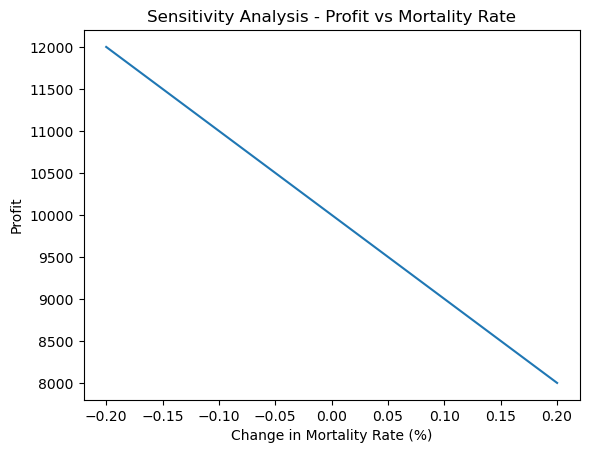

In [38]:
def plot_sensitivity(mortality_rate, changes=[-0.2, -0.1, 0, 0.1, 0.2]):
    profits = []
    for change in changes:
        new_rate = mortality_rate * (1 + change)
        profit = calculate_profit(sum_assured, premium, new_rate, term)
        profits.append(profit)
    
    plt.plot(changes, profits)
    plt.xlabel("Change in Mortality Rate (%)")
    plt.ylabel("Profit")
    plt.title("Sensitivity Analysis - Profit vs Mortality Rate")
    plt.show()

plot_sensitivity(mortality_rate)

**Key Observation:**<br>
The relationship between profit and the mortality rate is **inversely proportional**. This means that as the mortality rate increases, the profit decreases, and vice versa.<br>
<br>
**Practical Insight:**<br>
This sensitivity analysis shows that managing the mortality risk is critical to maintaining profitability. If the actual mortality rate exceeds expectations, it can significantly reduce profit margins, while a lower mortality rate can result in better financial performance.

## Cash Flows Calculation

In [40]:
# Function to calculate cash flows
def calculate_cash_flows(sum_assured, annual_premium, mortality_rate, term, expense_ratio):
    cash_flows = []
    
    for year in range(1, term + 1):
        # Inflow: premium
        inflow = annual_premium
        
        # Outflow: expected claims and expenses
        expected_claim = mortality_rate * sum_assured
        expenses = expense_ratio * annual_premium
        
        # Net cash flow: inflow - (expected claim + expenses)
        net_cash_flow = inflow - (expected_claim + expenses)
        cash_flows.append(net_cash_flow)
    
    return cash_flows

**Explanation:**<br>
This function calculates yearly cash flows over the policy term:<br>

`inflow`: Represents the premiums collected each year.<br>
`expected_claim`: Represents the claim payouts based on mortality.<br>
`expenses`: Represents the operational costs based on the expense ratio.<br>
`net_cash_flow`: The remaining cash flow after deducting claims and expenses from premiums.<br>

## Calculate IRR (Internal Rate of Return)

In [89]:
# Function to calculate IRR
def calculate_irr(cash_flows, annual_premium):
    irr = npf.irr([-annual_premium] + cash_flows)  # Initial investment is a negative cash flow
    return irr
    
# Calculate IRR
irr = calculate_irr(cash_flows, annual_premium)
print(f"Internal Rate of Return (IRR): {irr * 100:.2f}%")

Internal Rate of Return (IRR): 39.95%


This function calculates the Internal Rate of Return (IRR):<br>

It uses `numpy_financial.irr` to calculate the IRR.<br>
The initial cash outflow is negative (represented by the initial premium paid), followed by the yearly cash inflows calculated in the `calculate_cash_flows` function.<br>
<br>
With an IRR of approximately **39.95%**, it indicates a very strong return on investment for this life insurance product. This high IRR suggests that the premiums collected and the cash flows generated from the policy are significantly exceeding the costs associated with the claims and operational expenses. 

## Calculate Profit Margin

In [91]:
# Function to calculate Profit Margin
def calculate_profit_margin(cash_flows, annual_premium, term):
    total_premiums = annual_premium * term
    total_profit = sum(cash_flows)
    
    profit_margin = total_profit / total_premiums
    return profit_margin

# Calculate Cash Flows
cash_flows = calculate_cash_flows(sum_assured, annual_premium, mortality_rate, term, expense_ratio)

# Calculate Profit Margin
profit_margin = calculate_profit_margin(cash_flows, annual_premium, term)
print(f"Profit Margin: {profit_margin * 100:.2f}%")

Profit Margin: 40.00%


This function calculates the Profit Margin:<br>

`total_premiums`: Total premiums collected over the policy term.<br>
`total_profit`: Sum of the net cash flows over the term.<br>
`profit_margin`: The ratio of total profit to total premiums collected, providing an overall measure of profitability.<br>
<br>
With a profit margin of **40%**, it indicates that the product is retaining a significant portion of the premiums collected as profit after covering claims and expenses. This strong profit margin suggests that the life insurance product is effectively managing its costs relative to the revenues generated, which is a positive sign for overall profitability.

**Conclusion**<br>
This sensitivity analysis highlights the intricate relationship between mortality rates and the profitability of the life insurance product(Hypothetical in this case), demonstrating that fluctuations in mortality can significantly impact financial outcomes. The calculated Internal Rate of Return (IRR) of approximately **39.95%** and a profit margin of **40%** indicate a strong financial performance and effective pricing strategy, underscoring the product's viability in the market.<br>
<br>
**THANK YOU FOR TAKING TIME TO REVIEW MY PROJECT**